### HW2

#### Question 1.6

In [1]:
import numpy as np
import scipy.sparse.linalg as ll

In [2]:
# Create a matrix without outliers
no_outlier = np.array([[7, 7], [4, 8], [8, 5], [5, 4], [7, 8]])

m, n = no_outlier.shape

no_outlier = no_outlier.T
# Compute mean for no outlier case
mu1 = np.mean(no_outlier, axis=1)

# Compute covariance matrix
mu1_centered = no_outlier - mu1[:, None]
C1 = np.dot(mu1_centered, mu1_centered.T) / m

S, W = ll.eigs(C1)
S = S.real
W = W.real
S

C:\Users\jm121\AppData\Local\Temp\ipykernel_11532\2165312867.py:14: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  S, W = ll.eigs(C1)


array([2.03121822, 2.76878178])

In [3]:
with_outlier = np.array([[7, 7], [4, 8], [8, 5], [5, 4], [7, 8], [50, 1]])

m, n = with_outlier.shape

# Compute mean for with outlier case
mu2 = np.mean(with_outlier, axis=1)


with_outlier = with_outlier.T
# Compute mean for no outlier case
mu2 = np.mean(with_outlier, axis=1)

# Compute covariance matrix
mu2_centered = with_outlier - mu2[:, None]
C2 = np.dot(mu2_centered, mu2_centered.T) / m

S, W = ll.eigs(C2)
S = S.real
W = W.real
S

C:\Users\jm121\AppData\Local\Temp\ipykernel_11532\2480077658.py:17: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  S, W = ll.eigs(C2)


array([272.36294144,   2.13705856])

#### Q2 PCA: Food consumption in European countries

#### Part 1

In [4]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [5]:
# Load data
df = pd.read_csv("food-consumption.csv")
# Extract attributes from raw data into Numpy matrix form
data = np.array(df.values[:, 1:], dtype=np.float64)
data.shape

(16, 20)

In [6]:
# Treat food consumption as "feature" vectors
# The code below is adapted from the demo code, PCA_demo
m, n = data.shape  # m (16) countries and n (20) food items

# Normalize the data due to different ranges for each feature
std_data = np.std(data, axis=0)

data = data @ np.diag(np.ones(std_data.shape[0]) / std_data)
data = data.T

In [7]:
# Mean center the data
mu = np.mean(data, axis=1)
xc = data - mu[:, None]

# Covariance matrix
C = np.dot(xc, xc.T) / m

In [8]:
K = 2
S, W = ll.eigs(C, k=K)
S = S.real
W = W.real

In [9]:
dim1 = np.dot(W[:, 0].T, xc) / math.sqrt(S[0])
dim2 = np.dot(W[:, 1].T, xc) / math.sqrt(S[1])

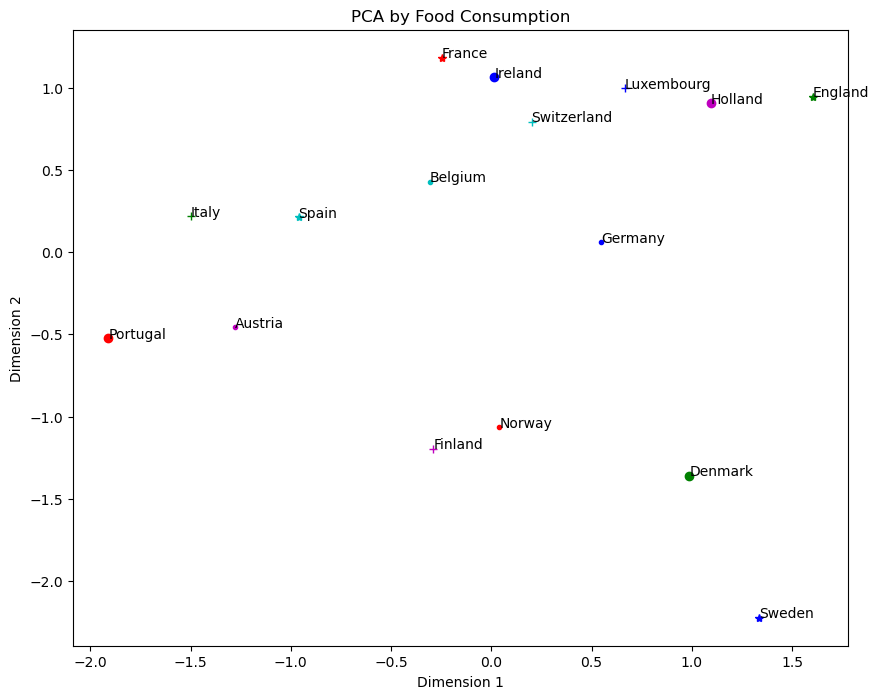

In [10]:
color_string = "bgrmck"
marker_string = ".+*opXD"

countries = [
    "Germany",
    "Italy",
    "France",
    "Holland",
    "Belgium",
    "Luxembourg",
    "England",
    "Portugal",
    "Austria",
    "Switzerland",
    "Sweden",
    "Denmark",
    "Norway",
    "Finland",
    "Spain",
    "Ireland",
]

food_fig = plt.figure(figsize=(10, 8))
for i in range(len(countries)):
    color = color_string[i % 5]
    marker = marker_string[i % 4]
    m = color + marker
    food_fig.gca().plot(dim1[i], dim2[i], m)
    plt.text(dim1[i], dim2[i], f"{countries[i]}")

plt.title("PCA by Food Consumption")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

#### Part 2

In [11]:
# Load data
df = pd.read_csv("food-consumption.csv")
# Extract attributes from raw data into Numpy matrix form
data = np.array(df.values[:, 1:], dtype=np.float64)

In [12]:
data = data.T
m, n = data.shape  # m (20) food items and n (16) countries

# Normalize the data due to different ranges for each feature
std_data = np.std(data, axis=0)
print(std_data.shape)

data = data @ np.diag(np.ones(std_data.shape[0]) / std_data)
data = data.T

(16,)


In [13]:
# Mean center the data
mu = np.mean(data, axis=1)
xc = data - mu[:, None]

# Covariance matrix
C = np.dot(xc, xc.T) / m

In [14]:
K = 2
S, W = ll.eigs(C, k=K)
S = S.real
W = W.real

In [15]:
dim1 = np.dot(W[:, 0].T, xc) / math.sqrt(S[0])
dim2 = np.dot(W[:, 1].T, xc) / math.sqrt(S[1])

In [16]:
dim1.shape

(20,)

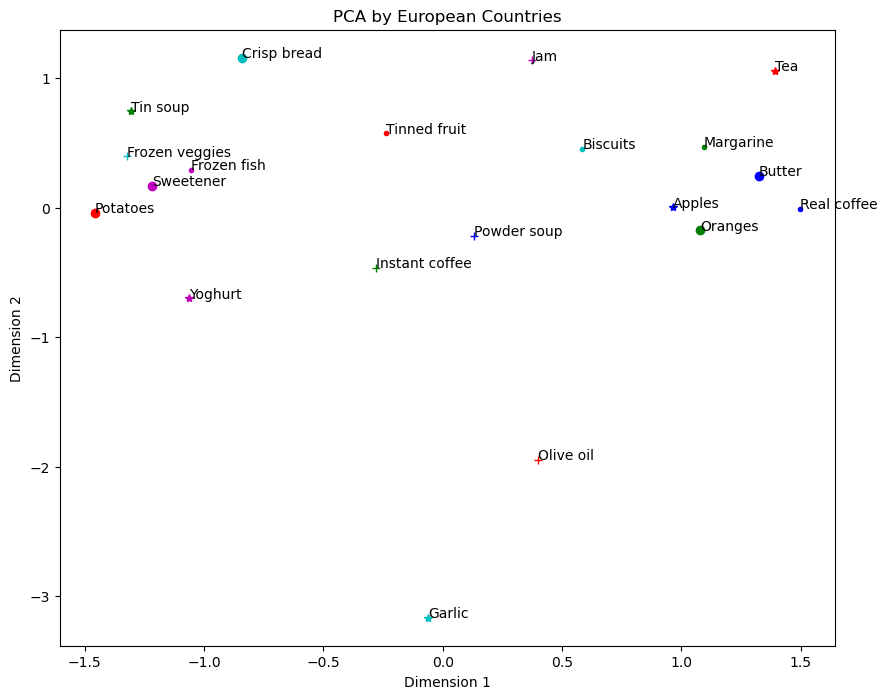

In [17]:
color_string = "bgrmck"
marker_string = ".+*opXD"

food_items = [
    "Real coffee",
    "Instant coffee",
    "Tea",
    "Sweetener",
    "Biscuits",
    "Powder soup",
    "Tin soup",
    "Potatoes",
    "Frozen fish",
    "Frozen veggies",
    "Apples",
    "Oranges",
    "Tinned fruit",
    "Jam",
    "Garlic",
    "Butter",
    "Margarine",
    "Olive oil",
    "Yoghurt",
    "Crisp bread",
]

country_fig = plt.figure(figsize=(10, 8))
for i in range(len(food_items)):
    color = color_string[i % 5]
    marker = marker_string[i % 4]
    m = color + marker
    country_fig.gca().plot(dim1[i], dim2[i], m)
    plt.text(dim1[i], dim2[i], f"{food_items[i]}")

plt.title("PCA by European Countries")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()